In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

### Input

In [ ]:
input_path: Path = Path(
    "../../../data/original/adni/ADNI_HAASS_WASHU_LAB_13Jul2023.csv"
).resolve()
output_path: Path = Path("../../../data/processed/adni/strem2.csv").resolve()

In [ ]:
usecols_: list[str] = ["RID", "VISCODE2", "EXAMDATE", "MSD_STREM2CORRECTED"]

In [3]:
df: pd.DataFrame = (
    pd.read_csv(input_path, usecols=usecols_, parse_dates=["EXAMDATE"])
    .dropna()
    .drop_duplicates()
    .convert_dtypes()
)

### Processing

In [4]:
df.rename(columns={"MSD_STREM2CORRECTED": "strem2"}, inplace=True)

In [5]:
# Filter by baseline visits
df: pd.DataFrame = df.loc[df["VISCODE2"].isin(["bl"])]

In [6]:
# Compute log10-transformed values
df["strem2_log10"] = np.log10(df["strem2"])

### Summary

In [7]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1842
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RID           1001 non-null   Int64         
 1   VISCODE2      1001 non-null   string        
 2   EXAMDATE      1001 non-null   datetime64[ns]
 3   strem2        1001 non-null   Float64       
 4   strem2_log10  1001 non-null   Float64       
dtypes: Float64(2), Int64(1), datetime64[ns](1), string(1)
memory usage: 49.9 KB


<Axes: >

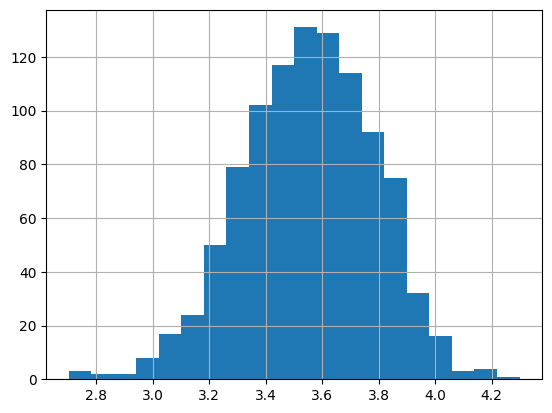

In [8]:
df["strem2_log10"].hist(bins=20)

### Output

In [9]:
df.drop(columns=["VISCODE2"], inplace=True)
df.to_csv(output_path, index=False)